In [1]:
# import packages needed

from scipy import stats
from statsmodels import tsa as TSA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa import arima_process as ARIMA_process
from statsmodels.graphics.api import qqplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Q1
(20%) Simulate a time series 𝑦𝑡 of length 𝑛 = 100 following an ARMA(1,1) model with 𝜙 = 0.8 and 𝜃 = 0.4. 
<br>
(a) Calculate and plot the theoretical autocorrelation function for this model. Plot sufficient lags until the 
correlations are negligible. 
<br>
(b) Calculate and plot the sample ACF for your simulated series. How well do the values and patterns match 
the theoretical ACF from part (a)? 
<br>
(c) Calculate and interpret the sample EACF for this series. Does the EACF help you specify the correct orders 
for the model? 
<br>
(d) Repeat parts (b) and (c) with a new simulation using the same parameter values but sample size 𝑛 = 48. 
<br>
(e) Repeat parts (b) and (c) with a new simulation using the same parameter values but sample size 𝑛 = 200. 

Simulation of Data:



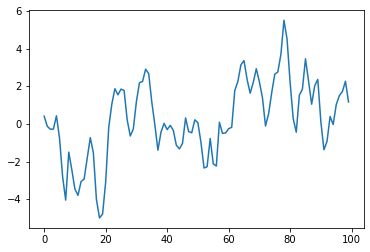

[0.74280408 0.46598534]
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(1, 1)   Log Likelihood                -140.992
Method:                       css-mle   S.D. of innovations              0.983
Date:                Sat, 04 Dec 2021   AIC                            287.984
Time:                        18:37:29   BIC                            295.799
Sample:                             0   HQIC                           291.147
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.7428      0.072     10.306      0.000       0.602       0.884
ma.L1.y        0.4660      0.096      4.837      0.000       0.277       0.655
                            

C:\Users\TerryYang\anaconda3\envs\TENSORFLOW\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [12]:
arparams = np.array([.8])
maparams = np.array([.4])

ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag

y_q1 = sm.tsa.arma_generate_sample(ar, ma, 100)

print("Simulation of Data:\n")
plt.plot(y_q1)
plt.show()

model_ARMA11 = sm.tsa.ARMA(y_q1 , (1, 1)).fit(trend='nc', disp=0)
print(model_ARMA11.params)
print(model_ARMA11.summary())

In [11]:
y_q1

array([ 6.36725590e-01,  9.17454644e-01, -6.70708352e-01, -2.03194420e+00,
       -1.32972286e-01,  3.30620472e-01,  2.52498894e-01, -2.39607591e-01,
       -4.88499825e-01,  2.03708032e-01,  1.60114850e+00,  7.84712398e-01,
       -7.76865935e-01, -6.16352869e-01, -2.92775706e-01,  2.35309470e-01,
        9.04945400e-01, -6.56616288e-01, -1.50877467e+00, -1.63531245e+00,
        4.35158713e-01,  2.15077775e+00,  1.86579239e+00,  7.59778478e-01,
        9.16059672e-01,  1.54850175e+00,  6.11719963e-01, -4.06069608e-01,
       -1.38364009e+00, -1.97542429e+00, -2.05905428e+00, -1.26259756e+00,
       -1.28987239e+00, -9.74831921e-02,  7.13123342e-01, -6.49630928e-01,
       -2.78213393e+00, -2.02750777e+00, -2.23711278e+00, -1.25518292e+00,
       -2.65523170e+00, -3.36002292e+00, -2.97345733e+00, -2.41295868e+00,
       -5.41565430e-01,  3.61293410e-01, -7.34094445e-01, -2.37347555e+00,
       -2.78679153e+00, -3.05141356e+00, -4.88290831e+00, -5.54314950e+00,
       -4.46418865e+00, -

# (a)
Answer is in the output specified below.

[1.         0.88       0.704      0.5632     0.45056    0.360448
 0.2883584  0.23068672 0.18454938 0.1476395  0.1181116  0.09448928
 0.07559142 0.06047314 0.04837851 0.03870281 0.03096225 0.0247698
 0.01981584 0.01585267]


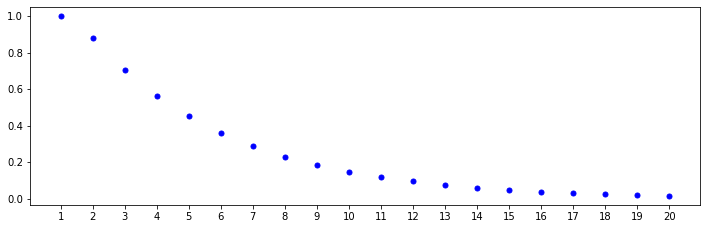

In [3]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)

y_q1_theoretical_acf = TSA.arima_process.arma_acf(ar=ar, ma=ma, lags=20)

print(y_q1_theoretical_acf)

plt.xticks([(i+1) for i in range(len(y_q1_theoretical_acf))])
plt.plot([(i+1) for i in range(len(y_q1_theoretical_acf))], y_q1_theoretical_acf, 'bo', markersize=5)

# plt.bar(x=[i+1 for i in range(len(y_q1_theoretical_acf))], height=y_q1_theoretical_acf, width=0.1)
plt.show()

# (b)
When we are exploring the absolute value of the sample ACF, the value is almost the same as theorectical ACF value; however, it seems that our sample ACF values are tend to have a slighter devreasing trend then the theorectical one.

ACF of the data:
 [ 1.          0.8606693   0.68868674  0.55759582  0.484785    0.46638922
  0.45831976  0.42937868  0.40268949  0.33341616  0.24850098  0.18284694
  0.14099739  0.14148992  0.14811611  0.13483912  0.08845526  0.02885096
 -0.01207716 -0.05445846 -0.09929125 -0.12413764 -0.16076861 -0.20915448
 -0.24944284 -0.30211126 -0.34004226 -0.34894246 -0.34200065 -0.31655639
 -0.31870182 -0.34919462 -0.35663753 -0.3381959  -0.32918106 -0.31947882
 -0.32021086 -0.31910951 -0.33043533 -0.34520832 -0.3480249  -0.34867236
 -0.35165783 -0.32710039 -0.29277217 -0.22832941 -0.173539   -0.16403093
 -0.16781713 -0.17063577 -0.14866271 -0.10989455 -0.09073268 -0.09245682
 -0.07182803 -0.0835746  -0.09135145 -0.07730888 -0.02307316  0.0532994
  0.11488378  0.12596244  0.12752099  0.13120819  0.14788096  0.19642593
  0.23408922  0.24697393  0.23589508  0.21213436  0.18242741  0.15353115
  0.13338134  0.15293998  0.1700698   0.18102313  0.17085464  0.13502809
  0.10514328  0.09803922  0.110998

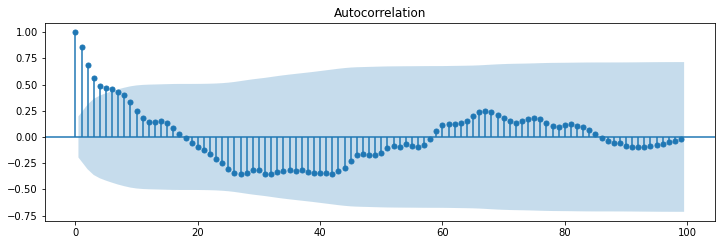

In [4]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
y_q1_acf = TSA.stattools.acf(y_q1, nlags=100, fft=False)
print("ACF of the data:\n", y_q1_acf, "\n")
fig = sm.graphics.tsa.plot_acf(y_q1, lags=99, ax=ax1)

# (c)
Yes, according to our EACF matrix, ARMA(1, 1) situate at the corner of the ecaf matrix, thus could be suitable choices when thinking about constructing models. So yes, the EACF matrix does assist up when choosing suitable paramenters when thinking about constructing the model.

In [5]:
# Code Reference: https://github.com/telmo-correa/time-series-analysis/blob/master/Python/eacf.py
# Reference of interpretation: https://stats.stackexchange.com/questions/416354/eacf-table-interpretation-in-r

import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.ar_model import AutoReg

def eacf(z, ar_max=7, ma_max=13, display=True):
    """
    Translation of the eacf function from R into Python.
   
    Original documentation:
    
    #
    #  PROGRAMMED BY K.S. CHAN, DEPARTMENT OF STATISTICS AND ACTUARIAL SCIENCE,
    #  UNIVERSITY OF IOWA.
    #
    #  DATE: 4/2001
    #  Compute the extended sample acf (ESACF) for the time series stored in z.
    #  The matrix of ESACF with the AR order up to ar.max and the MA order
    #  up to ma.max is stored in the matrix EACFM.
    #  The default values for NAR and NMA are 7 and 13 respectively.
    #  Side effect of the eacf function:
    #  The function prints a coded ESACF table with
    #  significant values denoted by * and nosignificant values by 0, significance
    #  level being 5%.
    #
    #  Output:
    #   eacf=matrix of esacf
    #   symbol=matrix of coded esacf
    #
    """

    def lag1(z, lag=1):
        return pd.Series(z).shift(lag)
    
    def reupm(m, nrow, ncol):
        k = ncol - 1
        m2 = np.empty((m.shape[0], k))
        for i in range(k):
            i1 = i + 1
            work = lag1(m1[:, i])
            work[0] = -1
            temp = m1[:, i1] - work * m1[i1, i1]/m1[i, i]
            temp[i1] = 0
            m2[:, i] = temp
        return m2
    
    def ceascf(m, cov1, nar, ncol, count, ncov, z, zm):
        result = np.zeros(nar+1)
        result[0] = cov1[ncov + count - 1]
        for i in range(1, nar+1):
            A = np.empty((len(z) - i, i+1))
            A[:, 0] = z[i:]
            A[:, 1:] = zm[i:, :i]
            b = np.r_[1, -m[:i, i-1]]
            temp = A @ b
            result[i] = acf(temp, nlags=count, fft=False)[count]
        return result
    
    ar_max = ar_max + 1
    ma_max = ma_max + 1
    nar = ar_max - 1
    nma = ma_max
    ncov = nar + nma + 2
    nrow = nar + nma + 1
    ncol = nrow - 1
    z = np.array(z) - np.mean(z)
    zm = np.empty((len(z), nar))
    for i in range(nar):
        zm[:, i] = lag1(z, lag=i+1)
    cov1 = acf(z, nlags=ncov, fft=False)
    cov1 = np.r_[np.flip(cov1[1:]), cov1]
    ncov = ncov + 1
    m1 = np.zeros((nrow, ncol))
    for i in range(ncol):
        m1[:i+1, i] = AutoReg(z, lags=i+1, trend='c').fit().params[1:]
        
    eacfm = np.empty((ar_max, nma))
    for i in range(nma):
        m2 = reupm(m = m1, nrow = nrow, ncol = ncol)
        ncol = ncol - 1
        eacfm[:, i] = ceascf(m2, cov1, nar, ncol, i+1, ncov, z, zm)
        m1 = m2
    
    work = np.arange(1, nar+2)
    work = len(z) - work + 1
    symbol = np.empty(eacfm.shape, dtype=object)
    for i in range(nma):
        work = work - 1
        symbol[:, i] = np.where(np.abs(eacfm[:, i]) > 2/np.sqrt(work), 'x', 'o')
    
    symbol = pd.DataFrame(symbol)
    if display:
        print('AR / MA')
        print(symbol)
    
    return {
        'eacf': eacfm,
        'ar.max': ar_max,
        'ma.max': ma_max,
        'symbol': symbol
    }

In [6]:
# calculate and interpret sampe EACF
result_dict_q1 =  eacf(y_q1, ar_max=6, ma_max=6, display=True)

print('\n\n ECAF Matrix: \n', np.around(result_dict_q1['eacf'], decimals=3))

AR / MA
   0  1  2  3  4  5  6
0  x  x  x  x  x  x  x
1  x  o  x  o  o  o  o
2  x  o  o  o  o  o  o
3  x  o  o  o  o  o  o
4  x  o  o  o  o  o  o
5  x  o  o  o  o  o  o
6  x  o  o  x  o  o  o


 ECAF Matrix: 
 [[ 0.861  0.689  0.558  0.485  0.466  0.458  0.429]
 [ 0.22  -0.05  -0.217 -0.174 -0.07   0.111  0.022]
 [ 0.398 -0.067 -0.092 -0.088 -0.088  0.126 -0.021]
 [-0.433  0.06   0.049  0.018 -0.174  0.124 -0.005]
 [-0.464  0.15   0.057  0.018 -0.077  0.119  0.006]
 [-0.45   0.138 -0.172  0.176  0.072  0.08  -0.132]
 [ 0.449 -0.105 -0.024  0.283 -0.035  0.141 -0.158]]


C:\Users\TerryYang\anaconda3\envs\TENSORFLOW\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\TerryYang\anaconda3\envs\TENSORFLOW\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\TerryYang\anaconda3\envs\TENSORFLOW\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\TerryYang\anaconda3\envs\TENSORFLOW\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released.

# (d)
Within this case, maybe due to the lack of samples, EACF tabls seems to be not that well for us to decide whether ARMA parameter to choose from to build up our model, since the circles do not really form at the corners.

Simulation of Data:



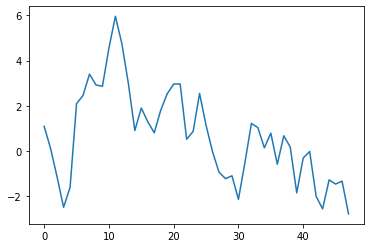

ACF of the data:
 [ 1.          0.7770713   0.55227701  0.43515295  0.34690705  0.2574876
  0.13860372  0.05242547  0.07200769  0.04679868  0.04720455  0.1145885
  0.14998239  0.19402449  0.11879157 -0.0073069  -0.05303129 -0.12120598
 -0.21450133 -0.21045267 -0.20072812 -0.21769274 -0.21650131 -0.20733592] 

AR / MA
   0  1  2  3  4  5  6
0  x  x  x  x  o  o  o
1  o  o  o  o  o  o  o
2  x  o  o  o  o  o  o
3  o  x  o  o  o  o  o
4  x  o  x  o  o  o  o
5  x  o  o  o  o  o  o
6  o  x  o  o  o  o  o


 ECAF Matrix: 
 [[ 0.7771  0.5523  0.4352  0.3469  0.2575  0.1386  0.0524]
 [ 0.2123 -0.2008 -0.0109 -0.023   0.133   0.0512 -0.283 ]
 [ 0.482  -0.2413  0.1114 -0.0131  0.1315  0.0041 -0.2933]
 [ 0.2597 -0.3658 -0.0218 -0.0356 -0.0066  0.022  -0.3096]
 [ 0.4486  0.0506  0.4639 -0.0607  0.0384 -0.0163 -0.2218]
 [ 0.3857 -0.1782  0.1568  0.0422 -0.022  -0.0949 -0.2424]
 [-0.0009  0.3362 -0.0674  0.1845 -0.0088 -0.0936 -0.2256]]


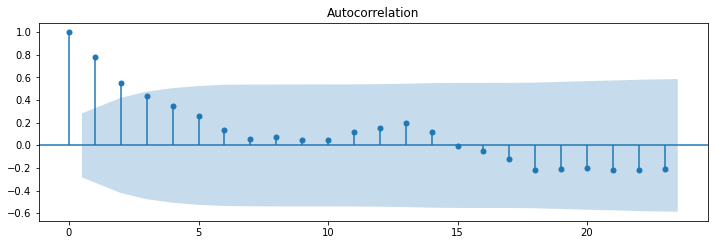

In [7]:
y_q1 = sm.tsa.arma_generate_sample(ar, ma, 48)

print("Simulation of Data:\n")
plt.plot(y_q1)
plt.show()


# (b) part
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
y_q1_acf = TSA.stattools.acf(y_q1, nlags=23, fft=False)
print("ACF of the data:\n", y_q1_acf, "\n")
fig = sm.graphics.tsa.plot_acf(y_q1, lags=23, ax=ax1)

# (c) part
# calculate and interpret sampe EACF
result_dict_q1 =  eacf(y_q1, ar_max=6, ma_max=6, display=True)

print('\n\n ECAF Matrix: \n', np.around(result_dict_q1['eacf'], decimals=4))

# (e)
With this case, agiain, because we do have sufficient samples to construct the model, we could conclude, from EACF table, that ARMA(1,1) and possibly ARMA(6,1) would be good choices when thinking about constructing the models.

Simulation of Data:



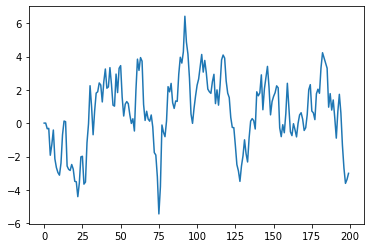

ACF of the data:
 [ 1.          0.86466076  0.70192072  0.59267097  0.49665605  0.43101988
  0.38430514  0.31994536  0.23613731  0.17926462  0.15458008  0.10857666
  0.03051312 -0.01559448 -0.06006965 -0.09562917 -0.11943143 -0.13383024
 -0.13751344 -0.12916806 -0.1225027  -0.10620113 -0.10400248 -0.11675447
 -0.11762252 -0.12427512 -0.11819935 -0.09782428 -0.0749212  -0.07187127
 -0.07968928 -0.09225749 -0.11073353 -0.11568546 -0.11701308 -0.14522787
 -0.14093736 -0.12882449 -0.13210764 -0.1164648  -0.09653165 -0.06844275
 -0.04520427 -0.04496349 -0.06836517 -0.07737433 -0.04198798  0.03554771
  0.0934451   0.11767287  0.13606707  0.14415132  0.16983882  0.19145585
  0.18123188  0.16853609  0.1614087   0.16039904  0.16632864  0.12445218
  0.09071019  0.07918002  0.06510064  0.07250016  0.07228011  0.04989382
  0.02654579  0.02678092  0.03506448  0.02116782 -0.0075691  -0.03378473
 -0.07170361 -0.09603073 -0.09659226 -0.09763141 -0.11273017 -0.1412038
 -0.15007226 -0.15326893 -0.155542

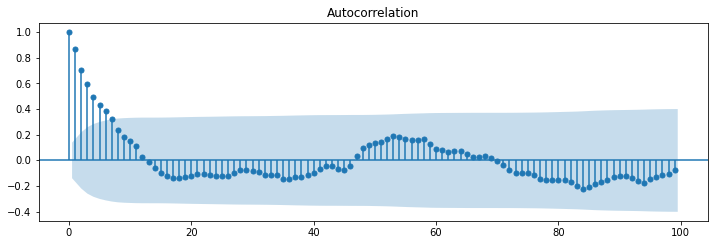

In [8]:
y_q1 = sm.tsa.arma_generate_sample(ar, ma, 200)

print("Simulation of Data:\n")
plt.plot(y_q1)
plt.show()

# (b) part
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
y_q1_acf = TSA.stattools.acf(y_q1, nlags=99, fft=False)
print("ACF of the data:\n", y_q1_acf, "\n")
fig = sm.graphics.tsa.plot_acf(y_q1, lags=99, ax=ax1)

# (c) part
# calculate and interpret sampe EACF
result_dict_q1 =  eacf(y_q1, ar_max=6, ma_max=6, display=True)

print('\n\n ECAF Matrix: \n', np.around(result_dict_q1['eacf'], decimals=4))

# Q2
(10%) Simulate an ARMA(1,1) series with 𝜙 = 0.7, 𝜃 = −0.6, 𝑛 = 48 but with error terms from a t-distribution with degrees of freedom 6.
<br>
(a) Display the sample EACF of the series. Is an ARMA(1,1) model suggested? 
<br>
(b) Estimate 𝜙 and 𝜃 from the series and comment on the results. 

In [9]:
# shared params
sample_size = 48
arparams = np.array([.7])
maparams = np.array([-0.6])

ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag

# error_terms = np.random.standard_t(df=6, size=sample_size)
# y_q2_arma = sm.tsa.arma_generate_sample(ar, ma, nsample=sample_size, distrvs=np.random.standard_t(), scale=1)

def np_random_standard_t():
    np.random.standard_t(6)

y_q2_arma = sm.tsa.arma_generate_sample(ar, ma, nsample=sample_size, distrvs=np_random_standard_t())

# y_q2_total = y_q2_arma + error_terms

print(y_q2_arma)

[-1.2533064   1.7911131   0.22929998 -1.00952141  0.17231889 -0.19123279
 -0.73679991  0.69598562  0.64562931 -1.17113523 -1.64491117 -0.43229201
 -1.01618316  0.11727739 -0.5739694  -0.74822725  1.34580624  2.30357805
 -0.10906878 -1.96386427  0.01496323  0.47046197  0.60846474  0.86343381
  1.40865882  0.78529798 -2.42562992  0.0787999  -1.19316912 -2.10881043
  0.16671537 -0.69266317  0.63947148 -1.27724969 -1.20309947  1.20520463
 -0.20990733 -0.48198011  0.28116897 -0.31168885  1.45811228  0.25425411
  0.61503523  1.49249647  1.42009083  0.7224641   0.06322174 -0.85015072]


# (a)
No, according to our result, the EACF table does not suggest from choosing ARMA(1,1) as out model construction choice, and instead maybe ARMA(6,1) would be a choice that we could test out a little bit. (though it may sounds a little wierd.)

In [10]:
result_dict =  eacf(y_q2_arma, ar_max=6, ma_max=6, display=True)

print('\n\n ECAF Matrix: \n', np.around(result_dict['eacf'], decimals=3))

AR / MA
   0  1  2  3  4  5  6
0  o  o  o  o  o  o  o
1  x  o  o  o  o  o  o
2  x  o  o  o  o  o  o
3  x  o  o  o  o  o  o
4  x  o  o  o  o  o  o
5  x  x  o  o  o  o  o
6  x  o  o  o  o  o  o


 ECAF Matrix: 
 [[ 0.148 -0.11   0.096 -0.072  0.003 -0.094  0.029]
 [ 0.52   0.036  0.011 -0.073  0.017 -0.096  0.088]
 [ 0.486  0.149  0.031  0.009 -0.028 -0.111  0.02 ]
 [ 0.5   -0.128  0.236  0.038 -0.029 -0.09   0.07 ]
 [ 0.423 -0.3    0.284  0.137 -0.025 -0.068  0.089]
 [ 0.37  -0.473  0.293 -0.12   0.169 -0.032  0.1  ]
 [ 0.498  0.144 -0.179 -0.31  -0.205 -0.223  0.116]]


# (b)
According to our model result, we could see that with the impact of the error term, the time series itself may be thus become different and lose some of the feature it use to have.

In [11]:
model_ARMA11 = sm.tsa.ARMA(y_q2_arma , (1, 1)).fit(trend='nc', disp=0)
print(model_ARMA11.params)

model_ARMA51 = sm.tsa.ARMA(y_q2_arma , (5, 1)).fit(trend='nc', disp=0)
print(model_ARMA51.params)

[-0.66096306  0.99999997]
[-0.40454603 -0.09886113  0.08611305 -0.06476432  0.0614425   0.70173105]


# Q3
(20%) The data file named robot contains a time series obtained from an industrial robot. The robot was put 
through a sequence of maneuvers, and the distance from a desired ending point was recorded in inches. 
<br>
(a) Display the time series plot of the data. Based on this information, do these data appear to come from a 
stationary or nonstationary process? 
<br>
(b) Calculate and plot the sample ACF and PACF for these data. Based on this additional information, do these 
data appear to come from a stationary or nonstationary process? 
<br>
(c) Calculate and interpret the sample EACF. 
<br>
(d) Estimate the parameters of an AR(1) model and IMA(1, 1) for these data, respectively. 
<br>
(e) Compare the results from parts (d) in terms of AIC and discuss the residual tests. 

# Answers

# (a)
It appears to be a time series process that is closed to stationary; however, I would not say that there it is "completely" not affected by a seasonality factor. I still think a low level of seasonality could be observed.

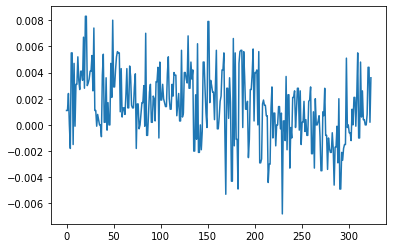

In [12]:
data_robot = pd.read_csv("./TSA HW06.robot.csv")

# plot time series
plt.plot(data_robot.iloc[:, 0])
plt.show()

# (b)
No, beacause we could still observe some surges locate during some high lagging time point.

ACF of the data:
 [1.         0.30783324 0.25566978 0.23055698 0.17865198 0.22107288
 0.27033903 0.24611092 0.21142418 0.17727591 0.0657404  0.14272676
 0.22197397 0.18413854 0.14504361 0.17153502 0.07790696 0.11469899
 0.10633323 0.07433559 0.14076585 0.12032392 0.04183479 0.1224336
 0.14076818 0.09712557 0.10132883 0.08767593 0.03942908 0.07944897
 0.04192904 0.12437817 0.15369894 0.18374963 0.19621703 0.09851629
 0.05004306 0.11206087 0.18417144 0.1033046  0.1237883 ] 

PACF of the data:
 [ 1.          0.30878629  0.17897378  0.12816037  0.05801476  0.12187917
  0.16098183  0.0985724   0.04634826  0.01701061 -0.10217277  0.04309717
  0.12675472  0.03966536 -0.02222452  0.05428249 -0.04340087  0.02460064
 -0.01322475 -0.04871273  0.04106402  0.0253549  -0.04662129  0.07685925
  0.06815938  0.00706725 -0.01205642 -0.0087051  -0.04932047  0.0086784
 -0.04167843  0.10873151  0.07275315  0.13505584  0.15500038 -0.05500797
 -0.11228575  0.0297702   0.08784812 -0.06573    -0.02510901] 



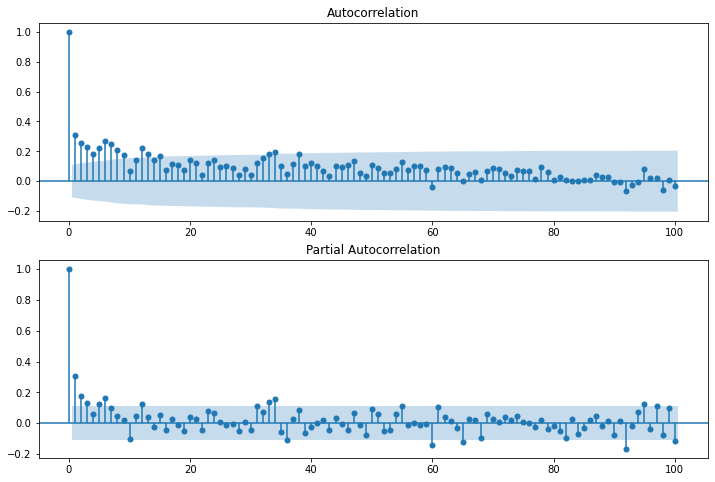

In [13]:
# plot acf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
data_acf = TSA.stattools.acf(data_robot, nlags=40, fft=False)
print("ACF of the data:\n", data_acf, "\n")
fig = sm.graphics.tsa.plot_acf(data_robot, lags=100, ax=ax1)

# pltp pacf
ax2 = fig.add_subplot(212)
data_pacf = TSA.stattools.pacf(data_robot, nlags=40)
print("PACF of the data:\n", data_pacf, "\n")
fig = sm.graphics.tsa.plot_pacf(data_robot, lags=100, ax=ax2)

# (c)
According to ECAF table, I would say that maybe ARMA(1,1) and ARMA(6,1) would be good choices to test out and see whether the model could explain the data.

In [14]:
# calculate and interpret sampe EACF
result_dict_q3 =  eacf(data_robot.iloc[:, 0], ar_max=6, ma_max=6, display=True)

print('\n\n ECAF Matrix: \n', np.around(result_dict_q3['eacf'], decimals=4))

AR / MA
   0  1  2  3  4  5  6
0  x  x  x  x  x  x  x
1  x  o  o  o  o  o  o
2  x  x  o  o  o  o  o
3  x  x  o  o  o  o  o
4  x  x  x  x  o  o  o
5  x  x  x  o  o  o  o
6  x  o  o  o  o  x  o


 ECAF Matrix: 
 [[ 0.3078  0.2557  0.2306  0.1787  0.2211  0.2703  0.2461]
 [-0.4419 -0.0201  0.0287 -0.0581  0.0029  0.0546  0.0104]
 [-0.4777 -0.3677 -0.009  -0.0601  0.0035  0.0471 -0.0092]
 [-0.378  -0.2     0.0546 -0.0575  0.0083  0.047  -0.0021]
 [-0.3909 -0.203  -0.3658 -0.1132  0.0122  0.0042  0.0373]
 [-0.4808  0.1863 -0.2249  0.1019  0.0092  0.0014  0.0109]
 [-0.4455  0.1079  0.0018  0.0889  0.0073 -0.3723  0.0035]]


# (d)
For AR(1) model, we can conclude that phi would be 0.001007, and with a intercept (error term) level at 0.308450.
For IMA(1,1) model, we can conclude a theta factor with the level -0.652171, and an integrated factor at a 0.000006 level.

In [15]:
model_AR1 = AutoReg(data_robot.iloc[:, 0], lags=1)
model_AR1_fit = model_AR1.fit()
print("AR(1) Model:\n", model_AR1_fit.params)
print(model_AR1_fit.summary())

model_ima = ARIMA(data_robot.iloc[:, 0], order=(0,1,1))
model_ima_fit = model_ima.fit()
print("\n\nIMA(1,1) Model:\n", model_ima_fit.params)
print(model_ima_fit.summary())

AR(1) Model:
 intercept    0.001007
robot.L1     0.308450
dtype: float64
                            AutoReg Model Results                             
Dep. Variable:                  robot   No. Observations:                  324
Model:                     AutoReg(1)   Log Likelihood                1470.544
Method:               Conditional MLE   S.D. of innovations              0.003
Date:                Sun, 29 Nov 2020   AIC                            -11.925
Time:                        23:39:56   BIC                            -11.890
Sample:                             1   HQIC                           -11.911
                                  324                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0010      0.000      6.246      0.000       0.001       0.001
robot.L1       0.3084      0.053      5.821      0.000    

# (e)
With AIC of AR(1) model -11.924836254711051 and AIC of IMA(1, 1) model -2938.5848085737, we conclude that IMA(1, 1) model fits better than the AR(1) one.

AIC of AR(1) model -11.924836254711051


AIC of IMA(1, 1) model -2938.5848085737 





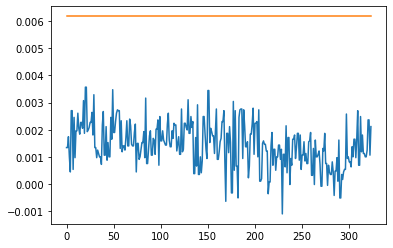

In [16]:
print("AIC of AR(1) model", model_AR1_fit.aic)

print("\n\nAIC of IMA(1, 1) model", model_ima_fit.aic, "\n\n\n")

# residual test
predict_AR = model_AR1.predict(start=0, end=(len(data_robot)), params=model_AR1_fit.params).tolist()
# predict_ima = model_ima.predict(start=0, end=(len(data_robot)), params=model_ima_fit.params).tolist()

for i in range(len(data_robot)):
    data_robot.loc[i, 'predict_AR'] = predict_AR[i]
    
    
plt.plot(data_robot.loc[:, 'predict_AR'])
plt.plot([(2/len(data_robot)) for i in range(len(data_robot))])
plt.show()